In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from seaborn import heatmap
import networkx as nx
import queue

In [2]:
def print_board(board):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - ")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("| ", end="")
            if j == 8:
                print(board[i][j])
            else:
                print(str(board[i][j]) + " ", end="")

In [32]:
sudoku_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]
sudoku_board2 = [
    [1, 2, 0, 0],
    [0, 0, 0, 2],
    [2, 0, 4, 0],
    [0, 0, 2, 1]
]
print("Original Sudoku Board:")
print_board(sudoku_board)

Original Sudoku Board:
5 3 0 | 0 7 0 | 0 0 0
6 0 0 | 1 9 5 | 0 0 0
0 9 8 | 0 0 0 | 0 6 0
- - - - - - - - - - - - 
8 0 0 | 0 6 0 | 0 0 3
4 0 0 | 8 0 3 | 0 0 1
7 0 0 | 0 2 0 | 0 0 6
- - - - - - - - - - - - 
0 6 0 | 0 0 0 | 2 8 0
0 0 0 | 4 1 9 | 0 0 5
0 0 0 | 0 8 0 | 0 7 9


In [12]:
# Create a Graph class
class SudokuGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {}
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node]    

In [42]:
def initialize_sudoku_graph(board):
    sudoku_graph = SudokuGraph()
    board_size = len(board)

    # Create nodes for each cell
    for i in range(board_size):
        for j in range(board_size):
            sudoku_graph.edges[(i, j)] = set()

    # Add edges between cells in the same row, column, and block
    for i in range(board_size):
        for j in range(board_size):
            for k in range(board_size):
                if k != j:
                    sudoku_graph.edges[(i, j)].add((i, k))  # Row
                if k != i:
                    sudoku_graph.edges[(i, j)].add((k, j))  # Column

            subgrid_size = int(board_size ** 0.5)
            start_row, start_col = subgrid_size * (i // subgrid_size), subgrid_size * (j // subgrid_size)
            for m in range(start_row, start_row + subgrid_size):
                for n in range(start_col, start_col + subgrid_size):
                    if m != i or n != j:
                        sudoku_graph.edges[(i, j)].add((m, n))  # Block

    return sudoku_graph

In [43]:
sudoku_graph = initialize_sudoku_graph(sudoku_board)
sudoku_graph2 = initialize_sudoku_graph(sudoku_board2)

In [44]:
sudoku_graph2.all_edges()

{(0, 0): {(0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (2, 0), (3, 0)},
 (0, 1): {(0, 0), (0, 2), (0, 3), (1, 0), (1, 1), (2, 1), (3, 1)},
 (0, 2): {(0, 0), (0, 1), (0, 3), (1, 2), (1, 3), (2, 2), (3, 2)},
 (0, 3): {(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)},
 (1, 0): {(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 0), (3, 0)},
 (1, 1): {(0, 0), (0, 1), (1, 0), (1, 2), (1, 3), (2, 1), (3, 1)},
 (1, 2): {(0, 2), (0, 3), (1, 0), (1, 1), (1, 3), (2, 2), (3, 2)},
 (1, 3): {(0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (2, 3), (3, 3)},
 (2, 0): {(0, 0), (1, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1)},
 (2, 1): {(0, 1), (1, 1), (2, 0), (2, 2), (2, 3), (3, 0), (3, 1)},
 (2, 2): {(0, 2), (1, 2), (2, 0), (2, 1), (2, 3), (3, 2), (3, 3)},
 (2, 3): {(0, 3), (1, 3), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3)},
 (3, 0): {(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3)},
 (3, 1): {(0, 1), (1, 1), (2, 0), (2, 1), (3, 0), (3, 2), (3, 3)},
 (3, 2): {(0, 2), (1, 2), (2, 2), (2, 3), (3, 0), (3, 1), (3, 

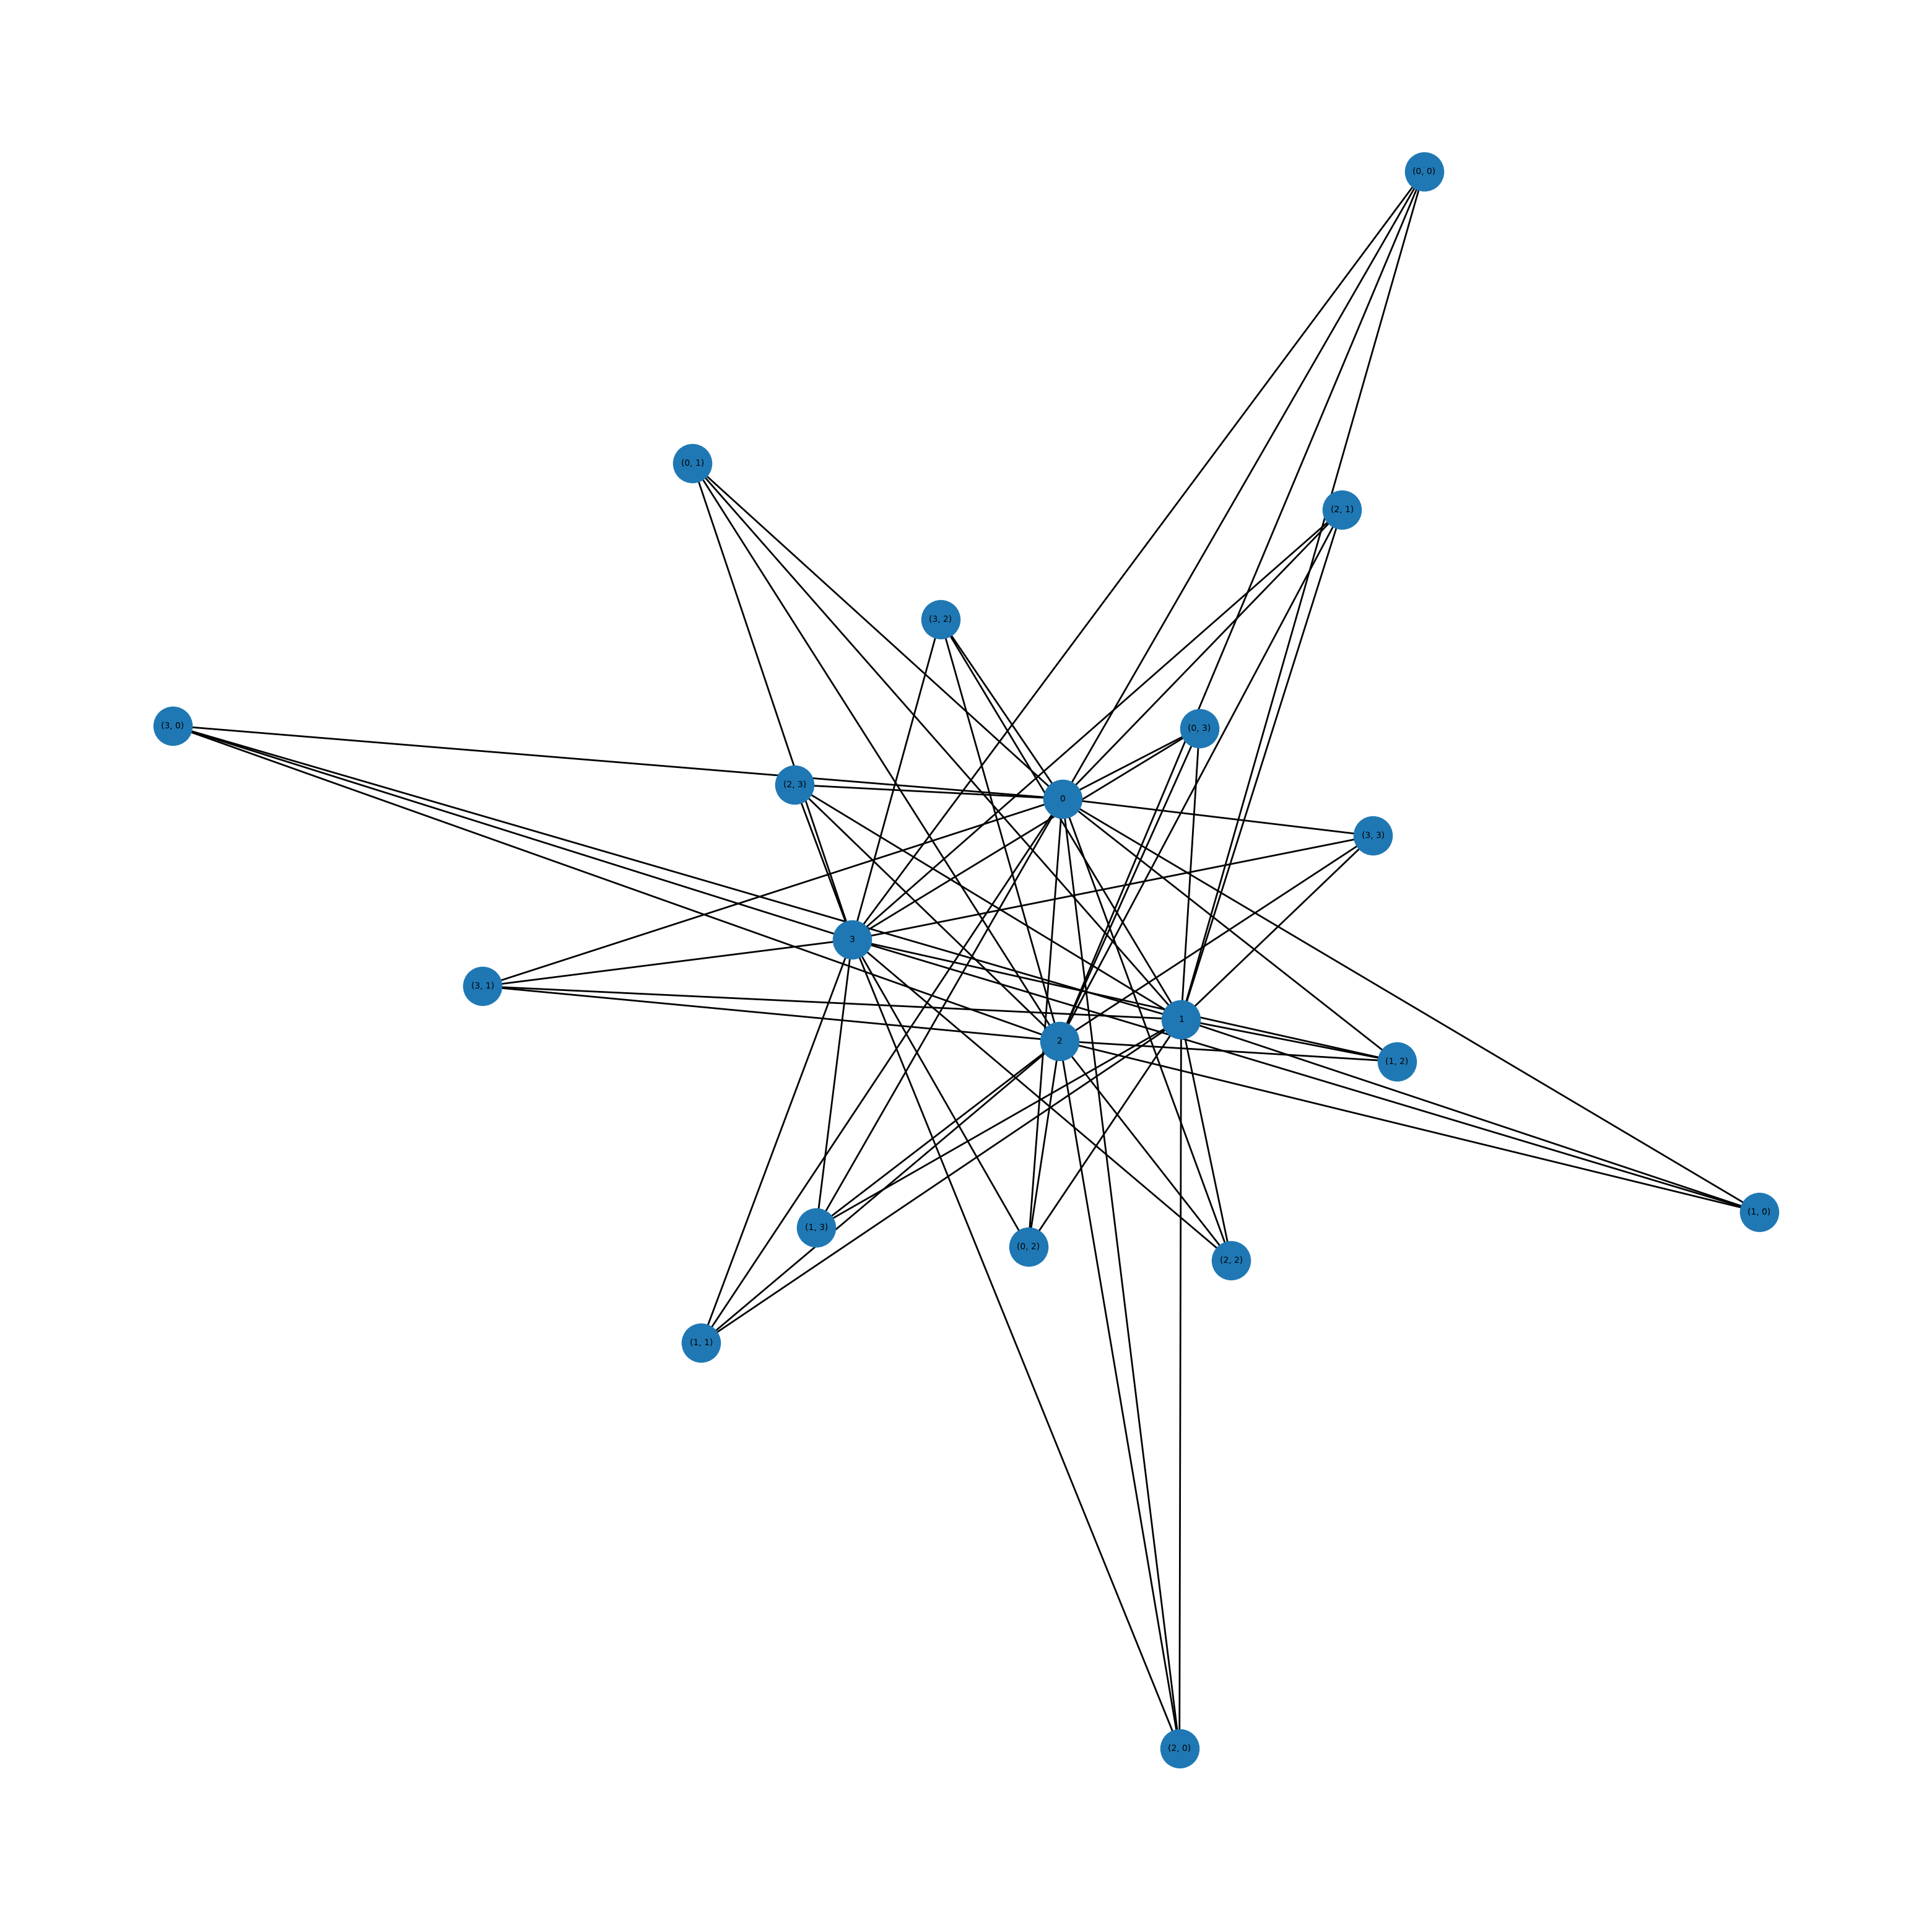

In [47]:
# Helper functions to display a Graph

def showSudokuGraph(sudokuGraph):
    ''' Display a graph using networkx
        Input : MazeGraph from 2D maze
        Output : Input graph displayed
    '''
    edgeDict = sudokuGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()
showSudokuGraph(sudoku_graph2)